# This is my experimental field for stocks analysis. 

It is planned to consist of mainly technical analysis of different stocks with a lot of charts.

In [139]:
import pandas as pd 
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import pandas_datareader.data as web
from pandas_datareader.nasdaq_trader import get_nasdaq_symbols
import datetime
from datetime import datetime
from __future__ import division
from functools import wraps
from pandas.stats import moments
import quandl 

First we import data from google finance.

In [140]:
stocks = ['LGF','JPM','INTC','WFC']
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)
for stock in stocks:   
    globals()[stock] = web.DataReader(stock,'google',start,end)



Some basic info about Wells Cargo

In [141]:
WFC.describe()

,Open,High,Low,Close,Volume
count,250.000000,251.000000,250.000000,251.000000,2.510000e+02
mean,54.581480,54.980837,54.193720,54.597769,1.857301e+07
std,2.005693,1.986951,1.971751,1.988733,7.220613e+06
min,49.610000,49.940000,49.270000,49.580000,1.031746e+06
25%,53.322500,53.660000,52.862500,53.280000,1.401820e+07
50%,54.505000,54.980000,54.140000,54.620000,1.685476e+07
75%,55.687500,56.095000,55.267500,55.725000,2.114258e+07
max,59.780000,59.990000,59.090000,59.730000,5.459064e+07


In [142]:
WFC.info()                       

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2016-11-28 to 2017-11-24
Data columns (total 5 columns):
Open      250 non-null float64
High      251 non-null float64
Low       250 non-null float64
Close     251 non-null float64
Volume    251 non-null int64
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


Closing price chart for JPM.

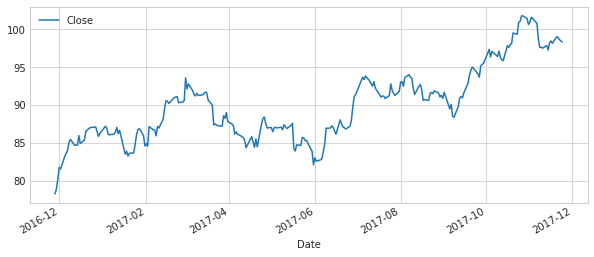

In [144]:
JPM['Close'].plot(legend=True,figsize=(10,4)) 

Volume chart for JPM.

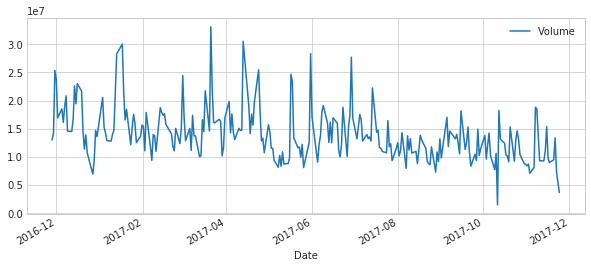

In [145]:
JPM['Volume'].plot(legend=True,figsize=(10,4))

Moving Averages for JPM(MACD).

In [146]:
ma_day = [10,20,40]
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    JPM[column_name]=JPM['Close'].rolling(ma).mean()

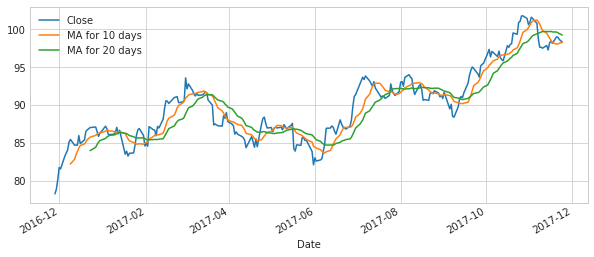

In [147]:
JPM[['Close','MA for 10 days','MA for 20 days']].plot(subplots=False,figsize=(10,4))

Daily return for JPM on different charts.

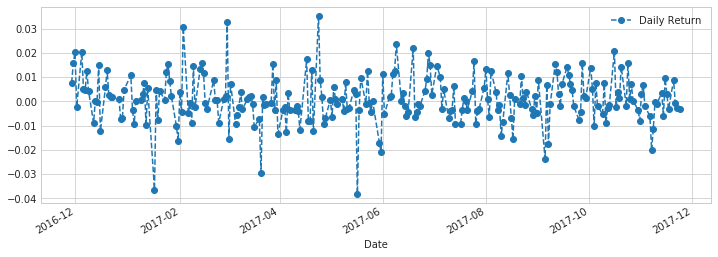

In [148]:
JPM['Daily Return'] = JPM['Close'].pct_change()
JPM['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

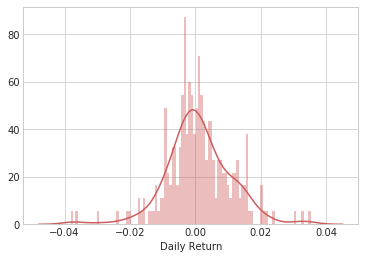

In [149]:
sns.distplot(JPM['Daily Return'].dropna(),bins=100,color='indianred')

We take closing prices of different stocks.

In [150]:
closing_df = web.DataReader(['LGF','JPM','INTC','WFC'],'google',start,end)['Close']

In [151]:
closing_df.head()

,INTC,JPM,LGF,WFC
Date,,,,
2016-11-28,35.51,78.32,23.06,51.58
2016-11-29,35.31,78.92,23.32,51.86
2016-11-30,34.70,80.17,23.40,52.92
2016-12-01,33.76,81.79,22.70,54.34
2016-12-02,34.16,81.60,22.72,53.58


Some more stocks returns based on closing prices with few types of charts.

In [152]:
stocks_rets = closing_df.pct_change()

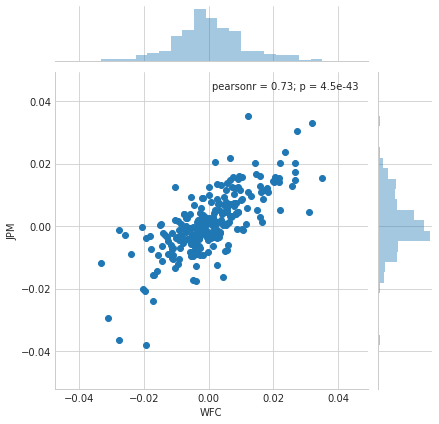

In [153]:
sns.jointplot('WFC','JPM',stocks_rets,kind='scatter')

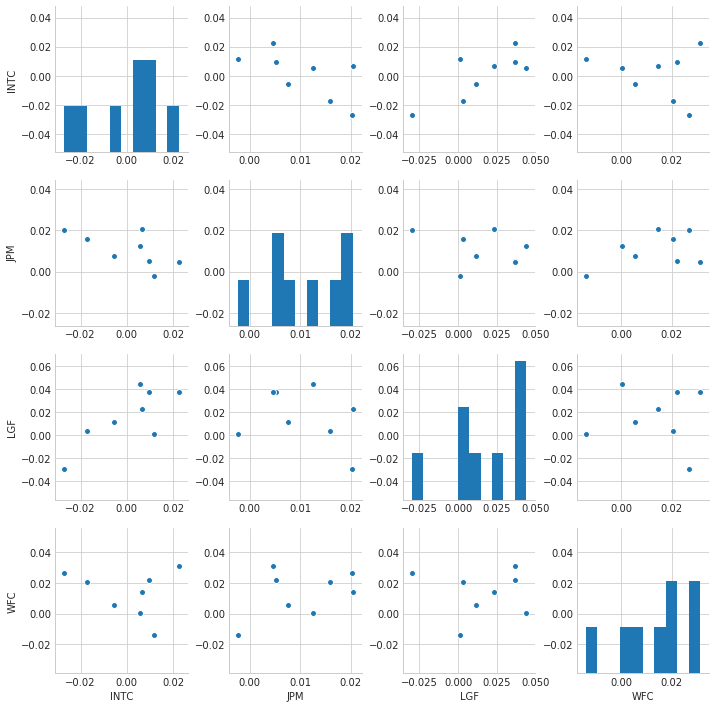

In [154]:
sns.pairplot(stocks_rets.dropna())

/home/tomek/tomek-workspace/pythons/notebook/lib/python3.5/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


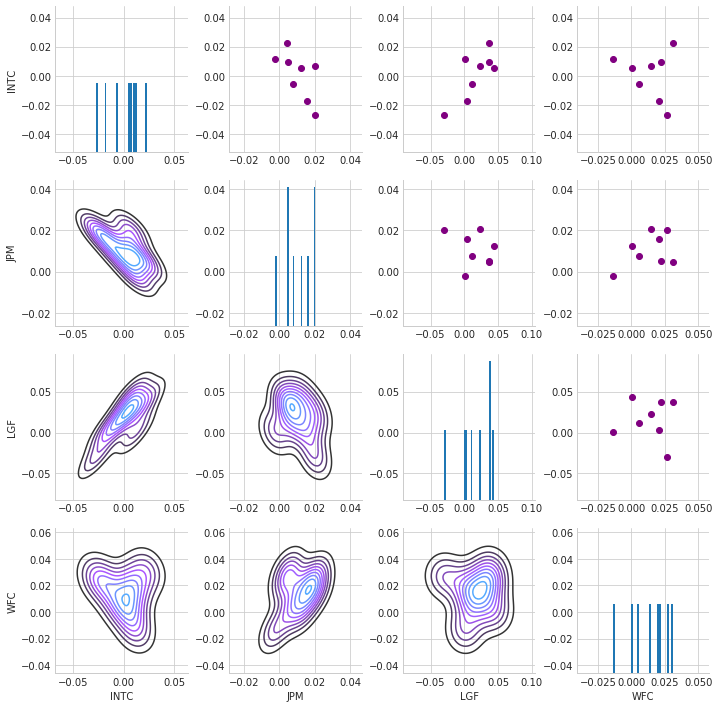

In [155]:
returns_fig = sns.PairGrid(stocks_rets.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

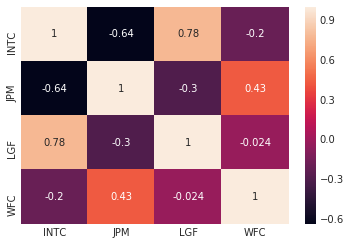

In [156]:
sns.heatmap(stocks_rets.dropna().corr(),annot=True)

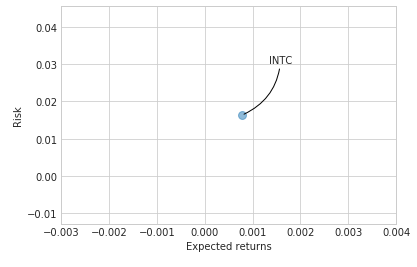

In [157]:
rets = stocks_rets.dropna()
area = np.pi*20
plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)
plt.xlim([-0.003,0.004])
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# label
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))


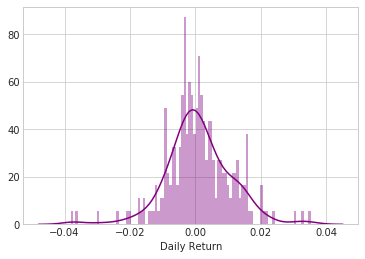

In [158]:
sns.distplot(JPM['Daily Return'].dropna(),bins=100,color='purple')

Because of constant problems with google/yahoo finance I have decided to try out quandl library. 

In [161]:
g_df = quandl.get('WIKI/GOOGL') 
SOk = pd.Series((g_df['Close'] - g_df['Low']) / (g_df['High'] - g_df['Low']), name = 'SO%k')  
s_g_df = g_df.join(SOk)  


,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,SO%k
Date,,,,,,,,,,,,,
2004-08-19,100.010,104.06,95.960,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0,0.540123
2004-08-20,101.010,109.08,100.500,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0,0.910256
2004-08-23,110.760,113.48,109.050,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0,0.079007
2004-08-24,111.240,111.60,103.570,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0,0.161893
2004-08-25,104.760,108.00,103.880,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0,0.514563
2004-08-26,104.950,107.95,104.660,107.910,7094800.0,0.0,1.0,52.637487,54.142132,52.492038,54.122070,7094800.0,0.987842
2004-08-27,108.100,108.62,105.690,106.150,6211700.0,0.0,1.0,54.217364,54.478169,53.008633,53.239345,6211700.0,0.156997
2004-08-30,105.280,105.49,102.010,102.010,5196700.0,0.0,1.0,52.802998,52.908323,51.162935,51.162935,5196700.0,0.000000
2004-08-31,102.320,103.71,102.160,102.370,4917800.0,0.0,1.0,51.318415,52.015567,51.238167,51.343492,4917800.0,0.135484
